In [1]:
import pandas as pd
import os

path = '/kaggle/input/chess-middle-game-all-data/Combined Middle Game Data'

# List to hold the dataframes
dataframes = []

# Range of years
years = range(2015, 2022)  # From 2015 to 2021

# Loop through each year
for year in years:
    # Initial part number and a flag to continue checking files
    part = 1
    continue_loading = True

    while continue_loading:
        filename = f'updated_games_{year}_part_{part}_game_info.csv'
        file_path = os.path.join(path, filename)
        
        # Read the CSV
        try:
            df = pd.read_csv(file_path)
            dataframes.append(df)
            part += 1  # Move to the next part
        except FileNotFoundError:
            continue_loading = False  # Stop trying to load more parts for this year when a file is not found

# Concatenate all dataframes into one
data = pd.concat(dataframes, ignore_index=True)

# View the first few rows of the data
print(data.head())

# Get summary information about the data
print(data.info())

                                game_id  game_order            event  \
0  65728ce1-1b6a-4ee2-aebc-d965b1decea4           1  GER-ch U25 op-A   
1  df620dd0-095c-4312-8b7c-b76d7d8bb037           2  GER-ch U25 op-A   
2  fb7a82d2-f60e-4afa-a3b4-b19beb859f59           3  GER-ch U25 op-A   
3  167a6683-1b2a-42fe-8642-3fc73f894ac6           4  GER-ch U25 op-A   
4  c54b951d-d44d-4b28-a87a-c5e23403fc27           5  GER-ch U25 op-A   

        site date_played round              white              black   result  \
0  Willingen  2015.05.30     9      Becker, Robin    Denkert, Robert  1/2-1/2   
1  Willingen  2015.05.30     9  Biefel, Christian    Neumann, Tiemon  1/2-1/2   
2  Willingen  2015.05.30     9  Boesel, Alexander  Schnabel, Bennett      1-0   
3  Willingen  2015.05.30     9    Borchert, Louis    Hartmann, Jakob  1/2-1/2   
4  Willingen  2015.05.30     9     Borchert, Rene      Riehle, Marco      0-1   

   white_elo  ...  termination  time_control  utc_date  utc_time  variant  \
0  

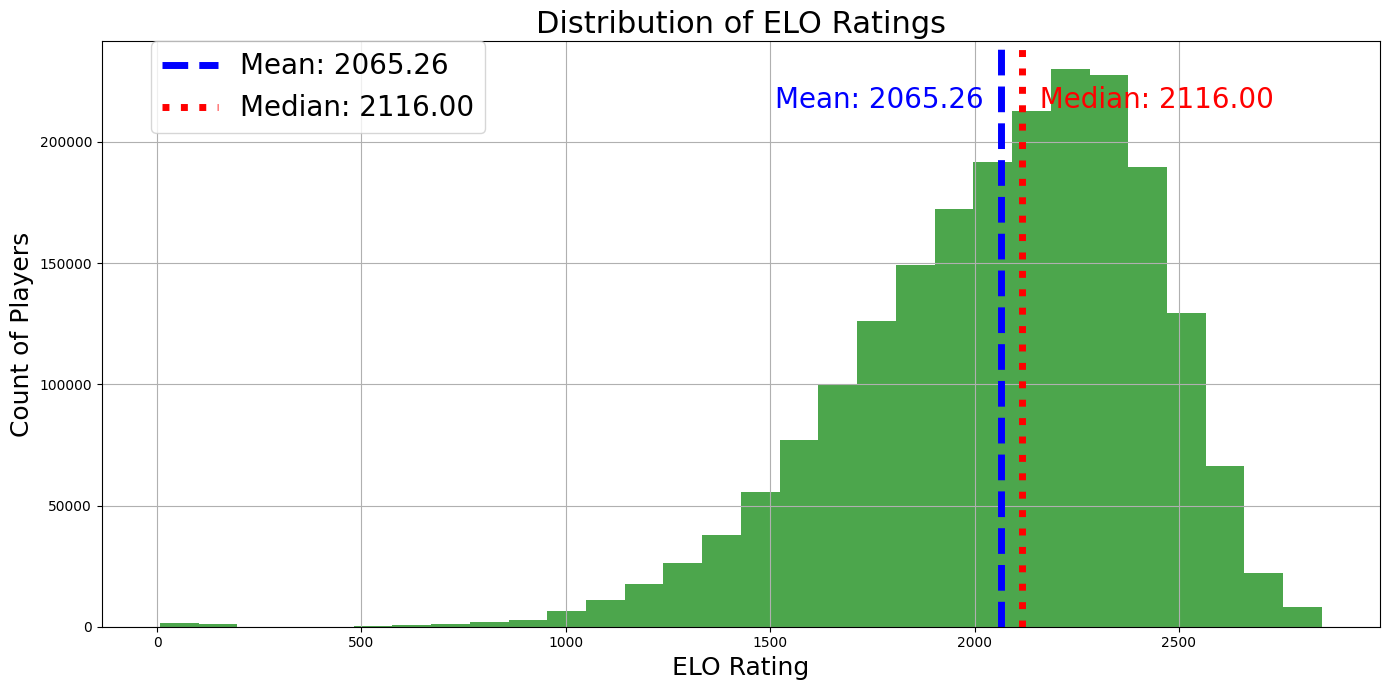

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new column for the combined ELO rating
data['combined_elo'] = (data['white_elo'] + data['black_elo']) / 2

# Calculate mean and median
mean_elo = data['combined_elo'].mean()
median_elo = data['combined_elo'].median()

# Plotting the distribution of the combined ELO rating
plt.figure(figsize=(14, 7))
data['combined_elo'].hist(bins=30, alpha=0.7, color='green')

# Add mean and median lines
plt.axvline(mean_elo, color='blue', linestyle='dashed', linewidth=5, label=f'Mean: {mean_elo:.2f}')
plt.axvline(median_elo, color='red', linestyle='dotted', linewidth=5, label=f'Median: {median_elo:.2f}')

# Add annotations for mean and median
plt.text(mean_elo, plt.ylim()[1] * 0.9, f'Mean: {mean_elo:.2f}  ', color='blue', ha='right', va='center', fontsize=20)
plt.text(median_elo, plt.ylim()[1] * 0.9, f'  Median: {median_elo:.2f}', color='red', ha='left', va='center', fontsize=20)

# Titles and labels
plt.title('Distribution of ELO Ratings', fontsize=22)
plt.xlabel('ELO Rating', fontsize=18)
plt.ylabel('Count of Players', fontsize=18)
plt.legend(fontsize=20, bbox_to_anchor=(0.3, 1), loc='upper right', borderaxespad=0)

plt.tight_layout()
plt.show()


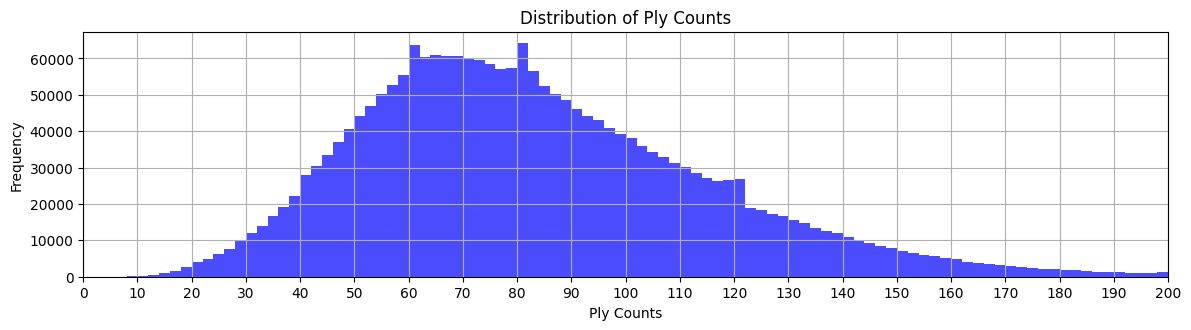

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
data['ply_count'].hist(bins=100, alpha=0.7, color='blue', range=(0, 200))
plt.title('Distribution of Ply Counts')
plt.xlabel('Ply Counts')
plt.ylabel('Frequency')

ax = plt.gca()  
ax.xaxis.set_major_locator(MultipleLocator(10))

plt.xlim(0, 200)

plt.show()